# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 1384 Степаненко Денис Владиславович и Белокобыльский Илья Вадимович.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения
Дискретное преобразование Фурье используется для анализа частотного спектра дискретного сигнала и выглядит следующим образом, где N - кол-во отсчетов в сигнале, $x_k$ - дискретный отсчет:
$$X(n)=\sum_{k=0}^{N-1}x_k e^{-j\frac{2\pi kn}{N}}$$

Линейное сглаживание выполняется по формулам по 5 и 9 точкам соответственно:
$$y_n = \frac{1}{5}\left(\sum_{k=n-2}^{k=n+2}x_k\right)$$

$$y_n = \frac{1}{9}\left(\sum_{k=n-4}^{k=n+4}x_k\right)$$

Сглаживание полиномом второй степени выполняется по формулам по 5 и 9 точкам соответственно:

$$y_n=\frac{1}{35}(-3x_{n-2}+12x_{n-1}+17x_n+12x_{n+1}-3x_{n+2})$$

$$y_n=\frac{1}{231}(-21x_{n-4}+14x_{n-3}+39x_{n-2}+54x_{n-1}+59x_n+54x_{n+1}+39x_{n+2}+14x_{n+3}-21x_{n+4})$$

Сглаживание полиномом четвертой степени выполняется по формулам по 7 и 11 точкам соответственно:

$$y_n=\frac{1}{231}(5x_{n-3}-30x_{n-2}+75x_{n-1}+131x_n+75x_{n+1}-30x_{n+2}+5x_{n+3})$$

По 11 точкам: $$y_n=\frac{1}{429}(18x_{n-5}-45x_{n-4}-10x_{n-3}+60x_{n-2}+120x_{n-1}+143x_n+120x_{n+1}+60x_{n+2}-10x_{n+3}-45x_{n+4}+18x_{n+5})$$

## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Подготовим необходимые функции для построения графиков.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams ['figure.figsize'] = [10, 6]
stem_n = 32
plot_n = 1000

def stem(X, interval, show=True, color='black', label=None):
    plt.stem(np.arange(*interval, (interval[1] - interval[0]) / stem_n), X, linefmt=color, markerfmt=color, label=label)
    if show:
        if label:
            plt.legend()
        plt.grid()
        plt.show()

### Пункт 1


Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида
$A_k\cos(\omega_kt + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета $(N=31)$.

Формула дискретного сигнала: $s(t)=\sum_{k=0}^{k=10}A_k cos(\omega_k t + \phi_k)$

Значения $A_k$ и $\varphi_k$ были получены с помощью генератора чисел np.random,
амплитуды гормоник были нормализованы по формуле: $A_k= \frac{A_k}{\sum_{i=0}^{10} A_i}$


In [2]:
omega_k = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
A_k = np.random.randint(1, 11, 11)
print(f"A_k до нормализации: {A_k}\n")

A_k = A_k / sum(A_k)
phi_k = np.random.random(size=11) / 2

print(f"A_k после нормализации: {A_k}\n")
print(f"phi_k: {phi_k}\n")


A_k до нормализации: [7 1 2 1 8 3 4 3 3 3 1]

A_k после нормализации: [0.19444444 0.02777778 0.05555556 0.02777778 0.22222222 0.08333333
 0.11111111 0.08333333 0.08333333 0.08333333 0.02777778]

phi_k: [0.4289757  0.22039536 0.01786403 0.34310919 0.1303037  0.01894243
 0.24092862 0.37586179 0.06492287 0.35011087 0.33820691]



### Пункт 2.


Визуализировать исходные аналоговый и дискретизированный сигналы.

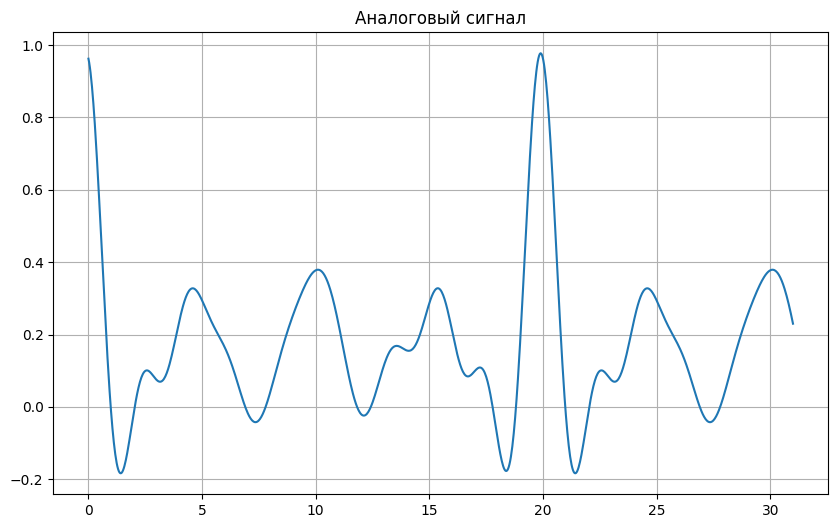

In [3]:
s = lambda k: sum(A_k[i] * np.cos(omega_k[i] * k + phi_k[i]) for i in range(11))
space = np.linspace(0, 31, 1000)
plt.plot(space, [s(x) for x in space])
plt.title('Аналоговый сигнал')
plt.grid()
plt.show()

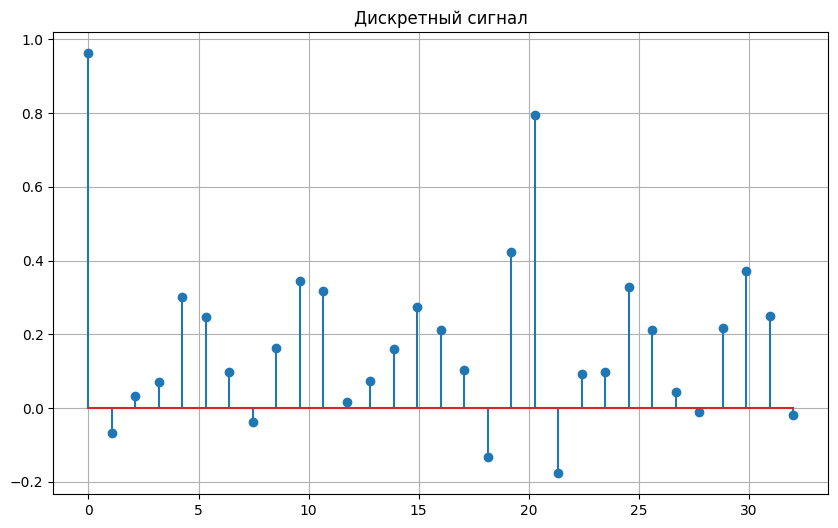

In [4]:
X, Y = [], []
n = 31
start = 0
end = 32
for i in range(n):
    x = start + i / (n-1) * (end - start)
    Y.append(s(x))
    X.append(x)
plt.grid()
plt.stem(X, Y)
plt.title('Дискретный сигнал')
plt.show()

###  Пункт 3.


С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

$X(n)=\sum_{k=0}^{N-1}x_k e^{-j\frac{2\pi kn}{N}}$

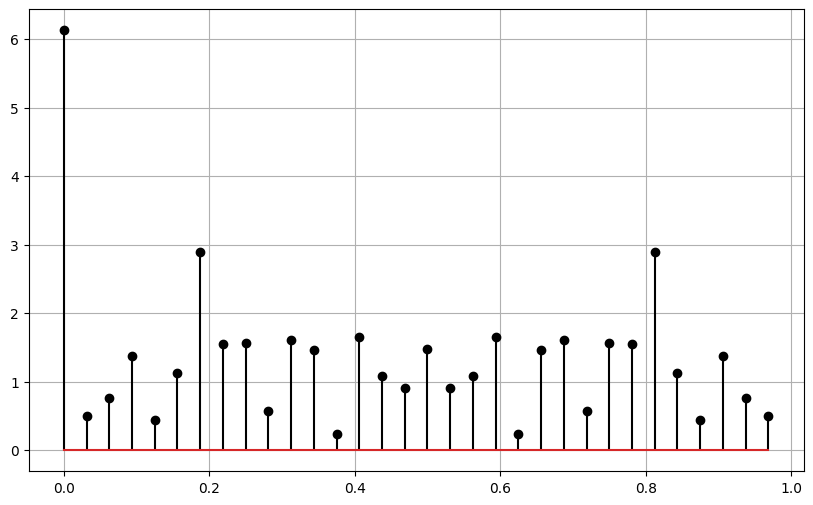

In [5]:
def dft(x, n):
    N = len(x)
    dft_val = sum( x[k] * np.exp(-2j * np.pi * k * n / N) for k in range(N) )
    return dft_val

x = [s(k) for k in range(32)]
dft_vals = np.abs([dft(x, n) for n in range(32)])

stem(dft_vals, [0, 1])

###  Пункт 4.

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Линейное сглаживание выполняется по формулам:
$$y_n = \frac{1}{5}\left(\sum_{k=n-2}^{k=n+2}x_k\right)$$

$$y_n = \frac{1}{9}\left(\sum_{k=n-4}^{k=n+4}x_k\right)$$

В третьей лабораторной работы были получены формулы:
$$H_5(\omega)=\frac{\sin\left(\frac{5\omega}{2}\right)}{5\cdot \sin\left( \frac{\omega}{2} \right)}$$

$$H_9(\omega)=\frac{\sin\left(\frac{9\omega}{2}\right)}{9\cdot \sin\left( \frac{\omega}{2} \right)}$$

###  Пункт 5.

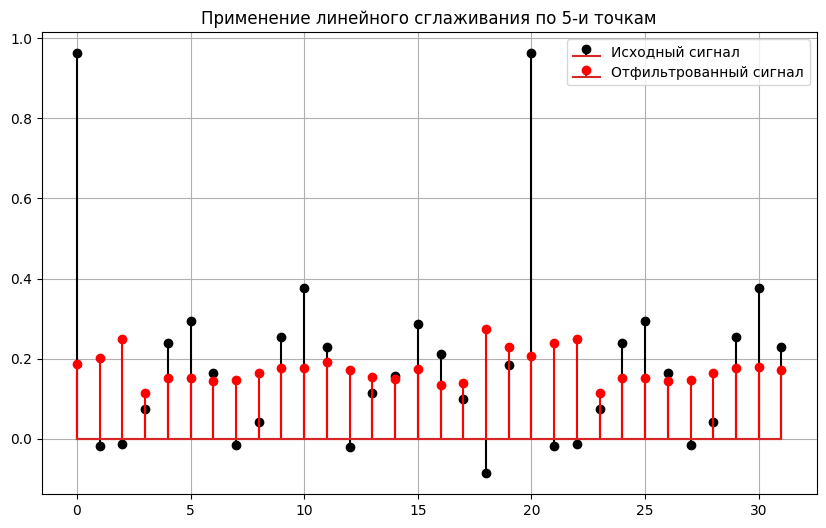

In [6]:
x_5_lin = np.convolve(x, np.ones(5) / 5, 'same')

plt.title('Применение линейного сглаживания по 5-и точкам')
stem(x, [0,32], show=False, label='Исходный сигнал')
stem(x_5_lin, [0,32], color='red', label='Отфильтрованный сигнал')

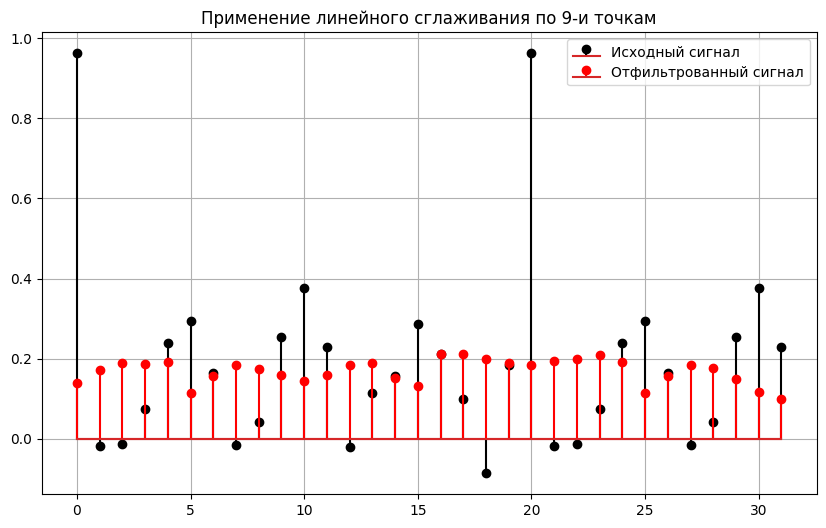

In [7]:
x_9_lin = np.convolve(x, np.ones(9) / 9, 'same')

plt.title('Применение линейного сглаживания по 9-и точкам')
stem(x, [0,32], show=False, label='Исходный сигнал')
stem(x_9_lin, [0,32], color='red', label='Отфильтрованный сигнал')

###  Пункт 6.

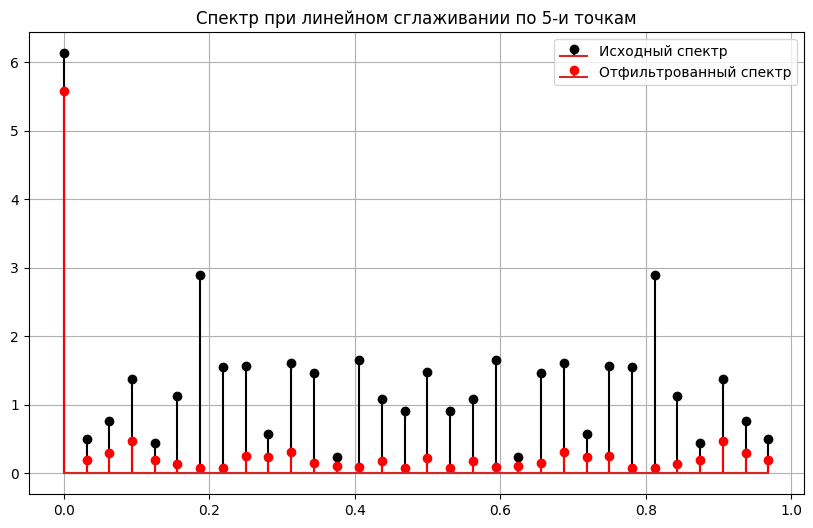

In [8]:
dft_5_lin = np.abs([dft(x_5_lin, n) for n in range(32)])

plt.title('Спектр при линейном сглаживании по 5-и точкам')
stem(dft_vals, [0, 1], show=False, label='Исходный спектр')
stem(dft_5_lin, [0, 1], color='red', label='Отфильтрованный спектр')

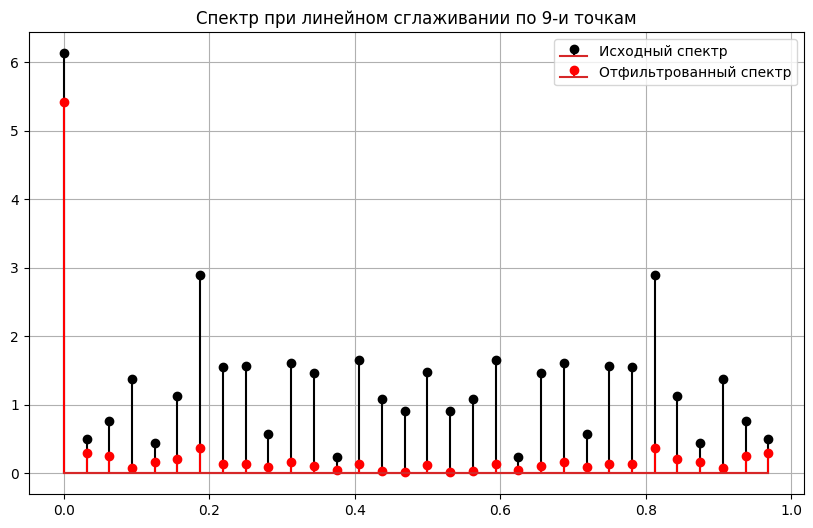

In [9]:
dft_9_lin = np.abs([dft(x_9_lin, n) for n in range(32)])

plt.title('Спектр при линейном сглаживании по 9-и точкам')
stem(dft_vals, [0, 1], show=False, label='Исходный спектр')
stem(dft_9_lin, [0, 1], color='red', label='Отфильтрованный спектр')

###  Пункт 7.
Исходя из полученного спектра можно сделать вывод, что с увеличением частоты сигнал подвергается более сильному ослаблению. При этом с увеличением числа точек в фильтре высокочастотный шум ослабляется сильнее, в связи с тем, что больший фильтр усредняет больше значений. Это соответствует передаточной функции фильтра $H(\omega)$.

###  Пункт 8a.

По 5 точкам: $$y_n=\frac{1}{35}(-3x_{n-2}+12x_{n-1}+17x_n+12x_{n+1}-3x_{n+2})$$

По 9 точкам: $$y_n=\frac{1}{231}(-21x_{n-4}+14x_{n-3}+39x_{n-2}+54x_{n-1}+59x_n+54x_{n+1}+39x_{n+2}+14x_{n+3}-21x_{n+4})$$

Передаточные функции: $$H_5(\omega)=\frac{1}{35}(17+24\cos(\omega)-6\cos(2\omega))$$

$$H_9(\omega)=\frac{1}{231}(59+108\cos(\omega)+78\cos(2\omega)+28\cos(3\omega)-42\cos(4\omega))$$

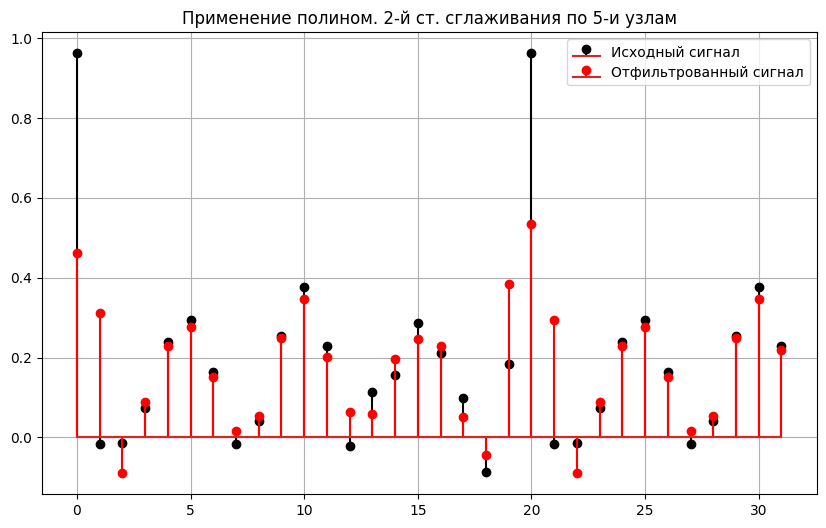

In [10]:
x_5_sqr = np.convolve(x, np.array([-3, 12, 17, 12, -3]) / 35, 'same')

plt.title('Применение полином. 2-й ст. сглаживания по 5-и узлам')
stem(x, [0,32], show=False, label='Исходный сигнал')
stem(x_5_sqr, [0,32], color='red', label='Отфильтрованный сигнал')

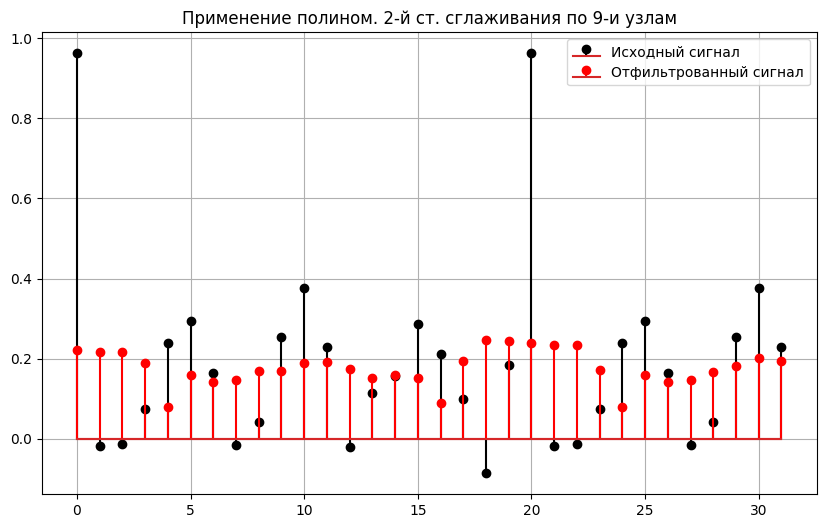

In [11]:
x_9_sqr = np.convolve(x, np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231, 'same')

plt.title('Применение полином. 2-й ст. сглаживания по 9-и узлам')
stem(x, [0,32], show=False, label='Исходный сигнал')
stem(x_9_sqr, [0,32], color='red', label='Отфильтрованный сигнал')

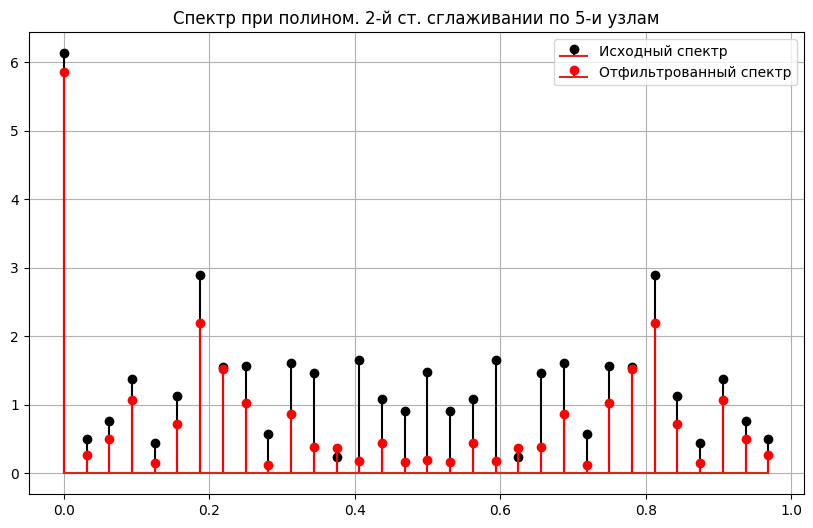

In [12]:
dft_5_sqr = np.abs([dft(x_5_sqr, n) for n in range(32)])

plt.title('Спектр при полином. 2-й ст. сглаживании по 5-и узлам')
stem(dft_vals, [0, 1], show=False, label='Исходный спектр')
stem(dft_5_sqr, [0, 1], color='red', label='Отфильтрованный спектр')

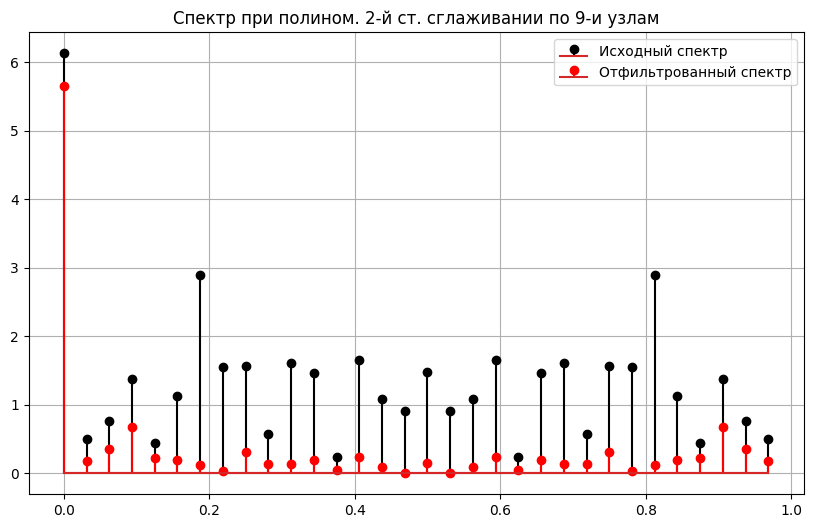

In [13]:
dft_9_sqr = np.abs([dft(x_9_sqr, n) for n in range(32)])

plt.title('Спектр при полином. 2-й ст. сглаживании по 9-и узлам')
stem(dft_vals, [0, 1], show=False, label='Исходный спектр')
stem(dft_9_sqr, [0, 1], color='red', label='Отфильтрованный спектр')

###  Пункт 8b.

По 7 точкам: $$y_n=\frac{1}{231}(5x_{n-3}-30x_{n-2}+75x_{n-1}+131x_n+75x_{n+1}-30x_{n+2}+5x_{n+3})$$

По 11 точкам: $$y_n=\frac{1}{429}(18x_{n-5}-45x_{n-4}-10x_{n-3}+60x_{n-2}+120x_{n-1}+143x_n+120x_{n+1}+60x_{n+2}-10x_{n+3}-45x_{n+4}+18x_{n+5})$$

Передаточные функции: $$H_7(\omega)=\frac{1}{231}(131+150\cos(\omega)-60\cos(2\omega)+10\cos(3\omega))$$

$$H_7(\omega)=\frac{1}{429}(143+240\cos(\omega)+120\cos(2\omega)-20\cos(3\omega)-90\cos(4\omega)+36\cos(5\omega))$$

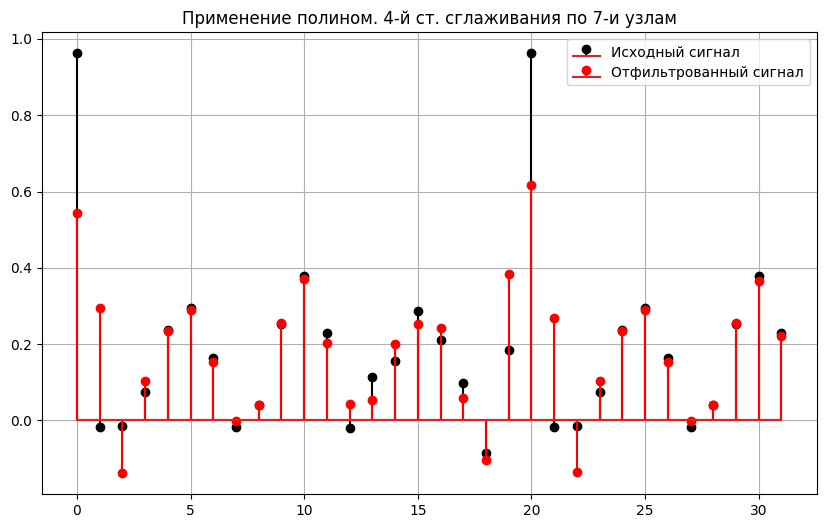

In [14]:
x_7_bisqr = np.convolve(x, np.array([5, -30, 75, 131, 75, -30, 5]) / 231, 'same')

plt.title('Применение полином. 4-й ст. сглаживания по 7-и узлам')
stem(x, [0,32], show=False, label='Исходный сигнал')
stem(x_7_bisqr, [0,32], color='red', label='Отфильтрованный сигнал')

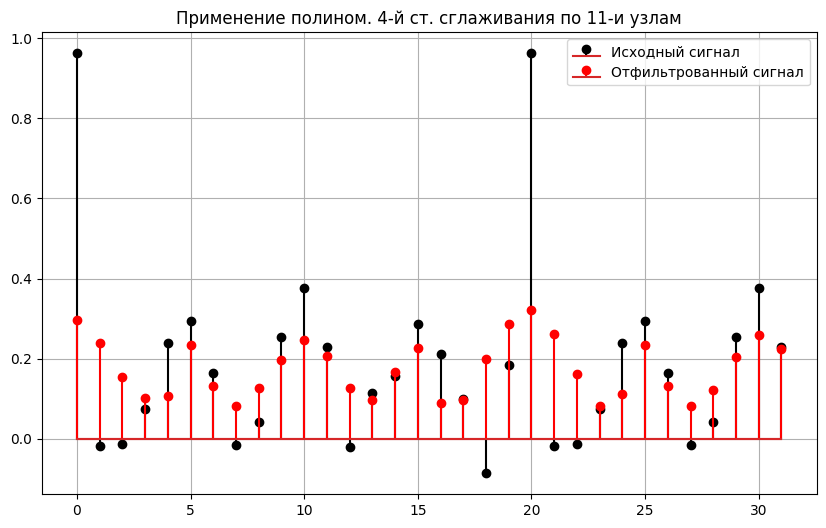

In [15]:
x_11_bisqr = np.convolve(x, np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13]) / 429, 'same')

plt.title('Применение полином. 4-й ст. сглаживания по 11-и узлам')
stem(x, [0,32], show=False, label='Исходный сигнал')
stem(x_11_bisqr, [0,32], color='red', label='Отфильтрованный сигнал')

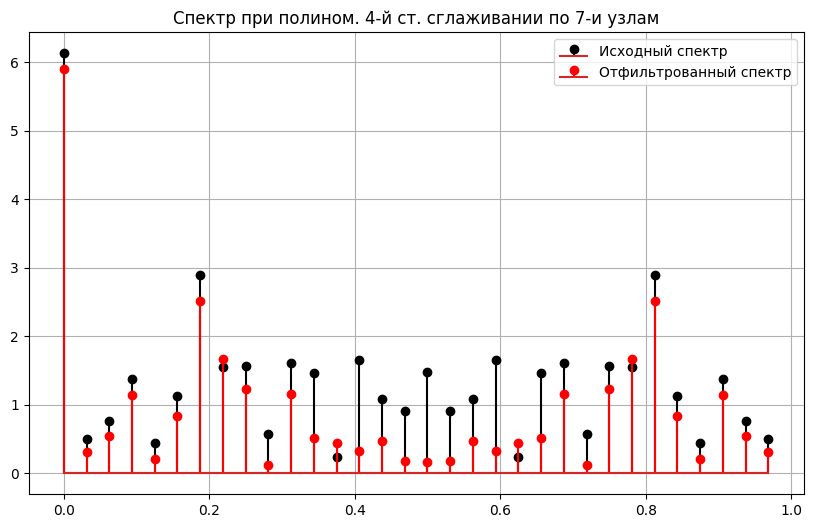

In [16]:
dft_7_bisqr = np.abs([dft(x_7_bisqr, n) for n in range(32)])

plt.title('Спектр при полином. 4-й ст. сглаживании по 7-и узлам')
stem(dft_vals, [0, 1], show=False, label='Исходный спектр')
stem(dft_7_bisqr, [0, 1], color='red', label='Отфильтрованный спектр')

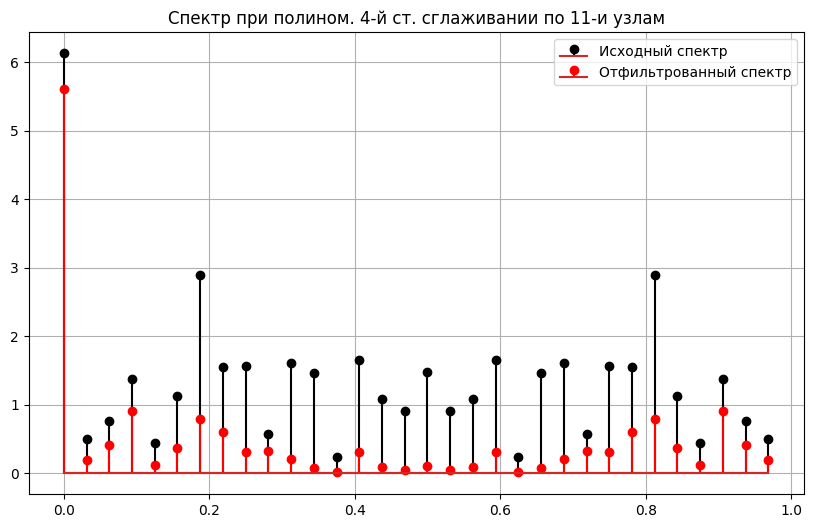

In [17]:
dft_11_bisqr = np.abs([dft(x_11_bisqr, n) for n in range(32)])

plt.title('Спектр при полином. 4-й ст. сглаживании по 11-и узлам')
stem(dft_vals, [0, 1], show=False, label='Исходный спектр')
stem(dft_11_bisqr, [0, 1], color='red', label='Отфильтрованный спектр')

###  Пункт 9.

Был сформирован сигнал - линейная комбинация из 11 косинусоид. Амплитуды, заданные случайно, были нормализованы. После дискретизации с шагом 1 исходный непрерывный сигнал был представлен в виде 32 отсчетов. Дискретный сигнал сохраняет основные характеристики и подходит для анализа, который был проведен далее.

За счет дискретного преобразования Фурье был визуализирован спектр сигнала. Таким образом, было выявлено наличие в исходном сигнале множества различных частот.

Линейное сглаживание показало снижение амплитуд при высоких частотах. При этом сглаживание на 9 точек было более эффективным в этом. Полиномиальное сглаживание показало похожие результаты, но с лучшей передачей формы сигнала. Также заметно, что с увеличением степени низкочастотные участки выделяются более четко, само сглаживание происходит более эффективно.

Таким образом, с увеличением количества точек и степени полинома, сглаживание становится более сильным без явного искажения низких частот.

## Выводы
В ходе выполнения лабораторной работы был сформирован дискретный сигнал, для которого впоследствии была осуществлена фильтрация дискретных последовательностей с помощью полиномиальных фильтров, а также проведен анализ результатов с использованием дискретного преобразования Фурье.